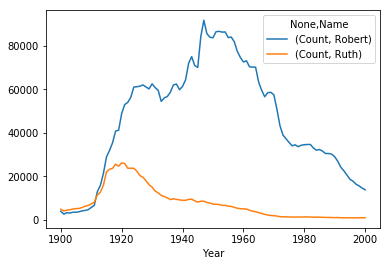

In [3]:
# Задание №1
import pandas as pd
import os
import matplotlib.pyplot as plt

DATA_PATH = f'{os.getcwd()}/names/'
def name_dynamics(step):
    names_by_year = {}
    for year in range(1900, 2001, step):
        names_by_year[year] = pd.read_csv('{}/yob{}.txt'.format(DATA_PATH, year),
            names=['Name','Gender','Count']
        )
    names_all = pd.concat(names_by_year, names=['Year', 'Pos'])
    name_dynamics = names_all.groupby([names_all.index.get_level_values(0), 'Name']).sum()
    return name_dynamics.query('Name == ["Ruth", "Robert"]').unstack('Name')

name_dynamics(1).plot()

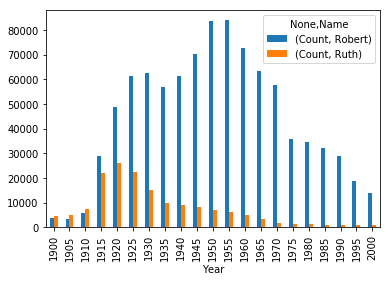

In [4]:
# Задание №2
name_dynamics(5).plot.bar()

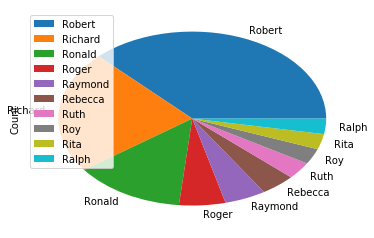

In [5]:
# Задание №3
def count_top_10(year):
    cols = ['Name', 'Gender', 'Count']
    names = pd.read_csv('{}/yob{}.txt'.format(DATA_PATH, year), names=cols)
    names_R = names[names.Name.str.startswith('R')]
    return names_R.groupby('Name').sum().sort_values(by='Count', ascending=False).head(10)

count_top_10(1950).plot.pie(y='Count')

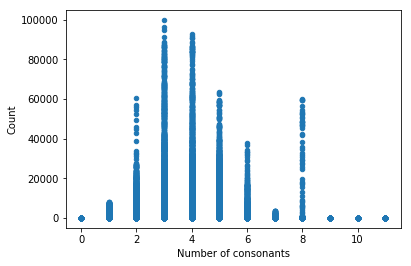

In [5]:
# Задание №4
names_by_year = {}
for year in range(1900, 2000, 1):
    names_by_year[year] = pd.read_csv('{}/yob{}.txt'.format(DATA_PATH, year),
        names=['Name','Gender','Count']
    )
names_all = pd.concat(names_by_year, names=['Year', 'Pos'])

def count_of_consonants():
    number_of_consonants = []
    vowels = ['a', 'i', 'o', 'u', 'e']
    for name in list(names_all.Name):
        common_vowels = []
        for letter in name:
            if letter.lower() in vowels:
                common_vowels.append(letter)
        number_of_consonants.append(len(name) - len(common_vowels))
    return number_of_consonants

names_all['Number of consonants'] = count_of_consonants()

names_all.plot.scatter(x='Number of consonants', y='Count')